# Time lapse imaging analysis with `byc`

## Install  [`byc`](https://github.com/johnpcooper/byc) and [`imagejpc`](https://github.com/johnpcooper/imagejpc) libraries to set up your environment

#### Install and configure `byc`

1. Clone `byc` from repo into your projects directory:
    ```sh
    cd c/Users/usrname/Projects
    git clone https://github.com/johnpcooper/byc
    ```
1. Create a python virtual environment, install required packages, and install byc
    ```sh
    # Install a virtual env manager
    pip install virtualenv
    # Create a directory for virual environments
    cd c/Users/usrname/Projects
    mkdir envs
    cd envs
    # Create the the virtual environment for byc
    python -m venv .byc
    # Activate the .byc virtual environment
    .byc/Scripts/activate # windows
    source .byc/bin/activate # macOS/linux
    # Install python packages required to run byc in your
    # .byc environment
    cd c/Users/usrname/Projects/byc
    # This may take a few minutes
    pip install -r requirements_minimal.txt
    # Add currently active .byc environment to the list
    # of environments accessible in ipykernels ( like jupyter
    # notebooks)
    python -m ipykernel install --user --name=.byc
    # Install the byc library in your currently active 
    # .byc environment using pip
    cd c/Users/usrname/Projects/byc
    pip install .
    ```

#### Install and configure `imagejpc`

1. Download [fiji](https://imagej.net/software/fiji/downloads). If you're on windows, extract files and move `fiji.app` folder to your appdata directory (e.g. `c/Users/usrname/AppData/Local`). If you're on macOS, leave the downloaded Fiji shortcut wherever its convenient and access plugins folder etc. byc '^ctrl' + 'left click' on the Fiji shortcut and select 'Show package contents' 
1. Clone `imagejpc` into your projects directory:
    ```sh
    cd c/Users/usrname/Projects/
    git clone https://github.com/johnpcooper/imagejpc
    ``` 
1. Edit hardcoded script location references in `macros/addCell.ijm`. Change the values that `script` and `python` are set to to reflect your local `byc` and `.byc` environment paths
1. Copy all plugin files (`.py` and `.ijm`) from `imagejpc/utilities` and `imagejpc/macros` into the plugins folder of Fiji at `C:/Users/usrname/AppData/Local`
1. Copy `imagejpc/macros/addCell.ijm` to your Fiji installation macros folder at `C:/Users/usrname/AppData/Local/Fiji.app/macros` (so that `IJ.runMacroFile('addCell.ijm', arg)` will be able to find it when run from a plugin)
1. Run Fiji with the executable at `C:/Users/usrname/AppData/Local/Fiji.app/ImageJ-win64.exe`. Fiji will automatically find the files you added to its plugins folder above and install them


## Register timelapse imaging output from &micro;manager

1. If you don't have a dataset to analyze, an example dataset from this [box link](https://utexas.box.com/s/tzfxumwhate722d4n3x8k273p65xuh9v)
1. Run the `byc` alignment script on raw &micro;manager output
    ```sh
    # activate your .byc environment
    cd C:/users/usrname/Projects
    envs/.byc/Scripts/activate
    # Run the alignment script. Once run, a GUI window will ask you
    # to choose the directory holding data. In the example dataset,
    # this is 20230126_byc_1
    python byc/bin/align_byc_expt.py # this will take a few minutes per xy position
    ```
1. The above aligned channel stacks are saved in a folder called `output`. You'll now want to copy these stacks into your data directory as detailed below before starting to annotate the data

# Annotate raw data with cell location and bud/cell fission events

### Create experiment and compartment directories and add channel stacks

1. If it doesn't already exist, add a byc data directory to your `byc` installation location. This is where `byc` modules look for data during annotation and following analysis steps
    ```sh
    mkdir C:/Users/usrname/Projects/envs/.byc/Lib/site-packages/data
    ```
1. Create an experiment directory in they byc data directory created above
    ```sh
    mkdir C:/Users/usrname/Projects/envs/.byc/Lib/site-packages/data/20230126_byc
    # 20230126_byc is the experiment name in the example dataset
    ```
1. Create a compartment directory in the experiment directory created above. This will hold all channel stacks corresponding to xy positions collected in the experiment that are within a certain flow compartment of the microfluidic device. The name of the compartment directory needs to identify the strain being imaged and potentially other conditions like small molecule concentration etc.
    ```sh
    # This copmartment directory name includes the strain number (which is all that's required) 
    # and additional more human readable information
    mkdir C:/Users/usrname/Projects/envs/.byc/Lib/site-packages/data/20230126_byc/20230126_byc_JPC228_UBL-YFP-Su9_BY4741
    ```
1. Copy the channel stacks from `output` to the compartment directory (`20230126_byc_JPC228_UBL-YFP-Su9_BY4741` in the example)
1. You are now ready start annotating data


### Annotate cell location (crop ROIs) and budding events (bud ROIs)

1. Run Fiji (`C:/Users/usrname/AppData/Local/Fiji.app/ImageJ-win64.exe`)
1. Open the xy stack you want to analyze (`20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_BY4741\20230126_byc_xy09_bf_stack.tif` inside the byc data directory you created above)
1. For each cell you want to analyze:
    1. Annotate crop ROIs, which are essentially key frames, to track the cell of interest. 
        * Draw a rectangular box with its center somewhere inside the cell at the first frame you want to segment. Press 't' to add this box selection to `RoiManager`. 
        * Scroll through the stack until you need to adjust the box selection to keep its center within the cell of interest. When needed, move the box so its center is within the cell of interest and press 't' to add the box to `RoiManager`
        * Add another ROI like above at the last frame you want to segment
        * Make sure that your ROIs in `RoiManager` are sorted by position (select all ROIs, right click, click 'sort')
        * Press 'L' to focus the Fiji search bar and type 'save cell roi set` and press enter
        * When prompted, enter ROI set type as "crop". Enter other annotation information as relevant
    1. Annotate bud ROIs, which are rectangular selections marking the frame before a bud first becomes visible (for cerevisiae data) or the frame at which the vertical fission line first becomes visible (for pombe data). These frame of interest are referred to as the "bud frame":
        * For each bud frame (as described above) draw a rectangular box around the area where the budding or fission event occurs. If analyzing budding yeast data, this frame will be used to annotate the shape of the daughter cell that came before the daughter appearing at the bud frame. If the previous daughter was round, press "6" to add the bud frame ROI to `RoiManager`. If the previous daughter was elongated, press "7" to add the bud frame ROI to `RoiManager`. If you're annotating fission yeast or daughter isn't relevant, simply press 't' to add an unlablled bud ROI to `RoiManager`
        * Once you have created an ROI for each bud frame as described above, add one more frame annotating the end of our observation of the current cell. If the cell escapes or dies, create an ROI at the frame in which the cell was last seen alive/in its catch tube. If the cells is still alive in the device when the experiment ends, create an ROI at the last frame of the stack
        * Sort the ROIs in `RoiManager`, press 'L' to focus the search bar, and enter 'save cell roi set'
        * When prompted, enter 'bud' as ROI set type. For 'end_event_type', enter 'death' if the cell dies during data collection, enter 'escape' if the cell escaped before dying or the end of the experiment, or enter 'sen' if the cell was still alive at the end of the experiment


# Segment cells and measure fluorescence using annotation data created above

In [1]:
import os
import re
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import seaborn as sns

from byc import constants, files, database, segmentation, utilities, trace_tools
from byc import standard_analysis as sa
from byc import plotting
from byc import fitting_tools as ft

from importlib import reload

for mod in [
    constants,
    files,
    database,
    segmentation,
    utilities,
    trace_tools
]:
    reload(mod)
plotting.set_styles(plt, matplotlib)

## Define the experiment and compartment you want to analyze

In [2]:
compartmentname = "20230126_byc_JPC228_UBL-YFP-Su9_test"
channels = "bf yfp rfp"
channels_list = channels.split()
exptname = utilities.exptname_from_compartment(compartmentname)
filename = f'{compartmentname}_alldf_measured.csv.gzip'
compartmentdir = files.get_byc_compartmentdir(exptname, compartmentname)
allmeasuredpath = os.path.join(compartmentdir, filename)
# Check that there are crop and bud roi dfs, which contain
# annotated information about the .zip roi files, for all the cells in the dataset
utilities.check_bud_and_crop_roi_dfs(compartmentdir)

Missing crop df .csv files for cells []
Missing bud df .csv files for cells []


## Segment cell areas with fluorescence data using otsu thresholding

### Segment dataset de novo

In [3]:
mdf = utilities.generate_mdf(exptname, compartmentname, channels=channels_list)
# Create cell crop stack files
segmentation.write_cell_crop_stacks(mdf, return_cellstacks_dict=False)
segkwargs = {
    'collection_interval_minutes': 10,
    'maskpath_suffix': 'cytosol',
    'channel_to_segment': 'rfp',
    'channels_to_measure': ['rfp', 'yfp'],
    'var_to_exclude_rois': 'major_axis_length',
    'set_outliers_to_nan': True
}
celldfs = segmentation.segment_and_measure_byc_dataset(mdf[0:5], **segkwargs)
# Further processing and annotation of fluorescence traces
# Includes features like cell cycle duration and number of cell divisions before death
segmentation.refine_and_annotate_celldfs(celldfs, mdf,
    collection_interval_minutes=10,
    channels_to_normalize=['rfp', 'yfp'],
    yvars=['mean'],
    channel_auto_fluors=[117, 136]
    )
tracesavepath = os.path.join(mdf.loc[0, 'compartment_dir'], f'{exptname}_alldf.csv')
alldf = pd.concat(celldfs)
alldf.index = range(len(alldf))
alldf.to_csv(tracesavepath, index=False)
print(f'Saved traces df at\n{tracesavepath}')

No measurement dfs for cell 0 yfp channel in compartment dir C:\Users\johnp\Dropbox\Projects\byc\data/20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test
No measurement dfs for cell 1 yfp channel in compartment dir C:\Users\johnp\Dropbox\Projects\byc\data/20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test
No measurement dfs for cell 2 yfp channel in compartment dir C:\Users\johnp\Dropbox\Projects\byc\data/20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test
Making roi dataframe for cell 0
Read in brightfield image with shape (552, 1024, 563) from
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_xy09_bf_stack.tif
Not looking for fluorescence trace measurements
Making roi dataframe for cell 1
No new bf stack needed
Not looking for fluorescence trace measurements
Making roi dataframe for cell 2
No new bf stack needed
Not looking for fluorescence trace measurements
Read in bf image with shape (552, 1024, 563) from
C:\Users\johnp\Dropbox\Proj

c:\.byc\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Saved segmented mask at59
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_xy09_cell000_rfp_stack_mask_cytosol.tif
Saved segmented outlines at
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_xy09_cell000_rfp_stack_drawn_ROIs_cytosol.tif
Tossing outliers
Threw out 6 of 59 frames with ROI major_axis_length less than 12.90379800815721
Tossing outliers
Threw out 6 of 59 frames with ROI major_axis_length less than 12.90379800815721
Tossing outliers
Threw out 6 of 59 frames with ROI major_axis_length less than 12.90379800815721
Tossing outliers
Threw out 6 of 59 frames with ROI major_axis_length less than 12.90379800815721
Tossing outliers
Threw out 6 of 59 frames with ROI major_axis_length less than 12.90379800815721
Tossing outliers
Threw out 6 of 59 frames with ROI major_axis_length less than 12.90379800815721
Using center x coord 50


c:\.byc\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Found large ROI, running watershed for frame 7
Found large ROI, running watershed for frame 9
Found large ROI, running watershed for frame 24
Found large ROI, running watershed for frame 25
Found large ROI, running watershed for frame 26
Found large ROI, running watershed for frame 27
Saved segmented mask at51
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_xy09_cell001_rfp_stack_mask_cytosol.tif
Saved segmented outlines at
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_xy09_cell001_rfp_stack_drawn_ROIs_cytosol.tif
Tossing outliers
Threw out 1 of 51 frames with ROI major_axis_length less than 15.833745065396178
Tossing outliers
Threw out 1 of 51 frames with ROI major_axis_length less than 15.833745065396178
Tossing outliers
Threw out 1 of 51 frames with ROI major_axis_length less than 15.833745065396178
Tossing outliers
Threw out 1 of 51 frames with ROI major_axis_length les

c:\.byc\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Found large ROI, running watershed for frame 26
Saved segmented mask at45
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_xy09_cell002_rfp_stack_mask_cytosol.tif
Saved segmented outlines at
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_xy09_cell002_rfp_stack_drawn_ROIs_cytosol.tif
Tossing outliers
Threw out 3 of 45 frames with ROI major_axis_length less than 14.105592801906646
Tossing outliers
Threw out 3 of 45 frames with ROI major_axis_length less than 14.105592801906646
Tossing outliers
Threw out 3 of 45 frames with ROI major_axis_length less than 14.105592801906646
Tossing outliers
Threw out 3 of 45 frames with ROI major_axis_length less than 14.105592801906646
Tossing outliers
Threw out 3 of 45 frames with ROI major_axis_length less than 14.105592801906646
Tossing outliers
Threw out 3 of 45 frames with ROI major_axis_length less than 14.105592801906646
Read crop_rois d

### Read in existing segmented data measurents

In [9]:
tracesavepath = os.path.join(mdf.loc[0, 'compartment_dir'], f'{exptname}_alldf.csv')
alldf = pd.read_csv(tracesavepath)
print(f'Read in traces df from\n{tracesavepath}')

Read in traces df from
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_alldf.csv


### Plot of individual fluorescence traces over time

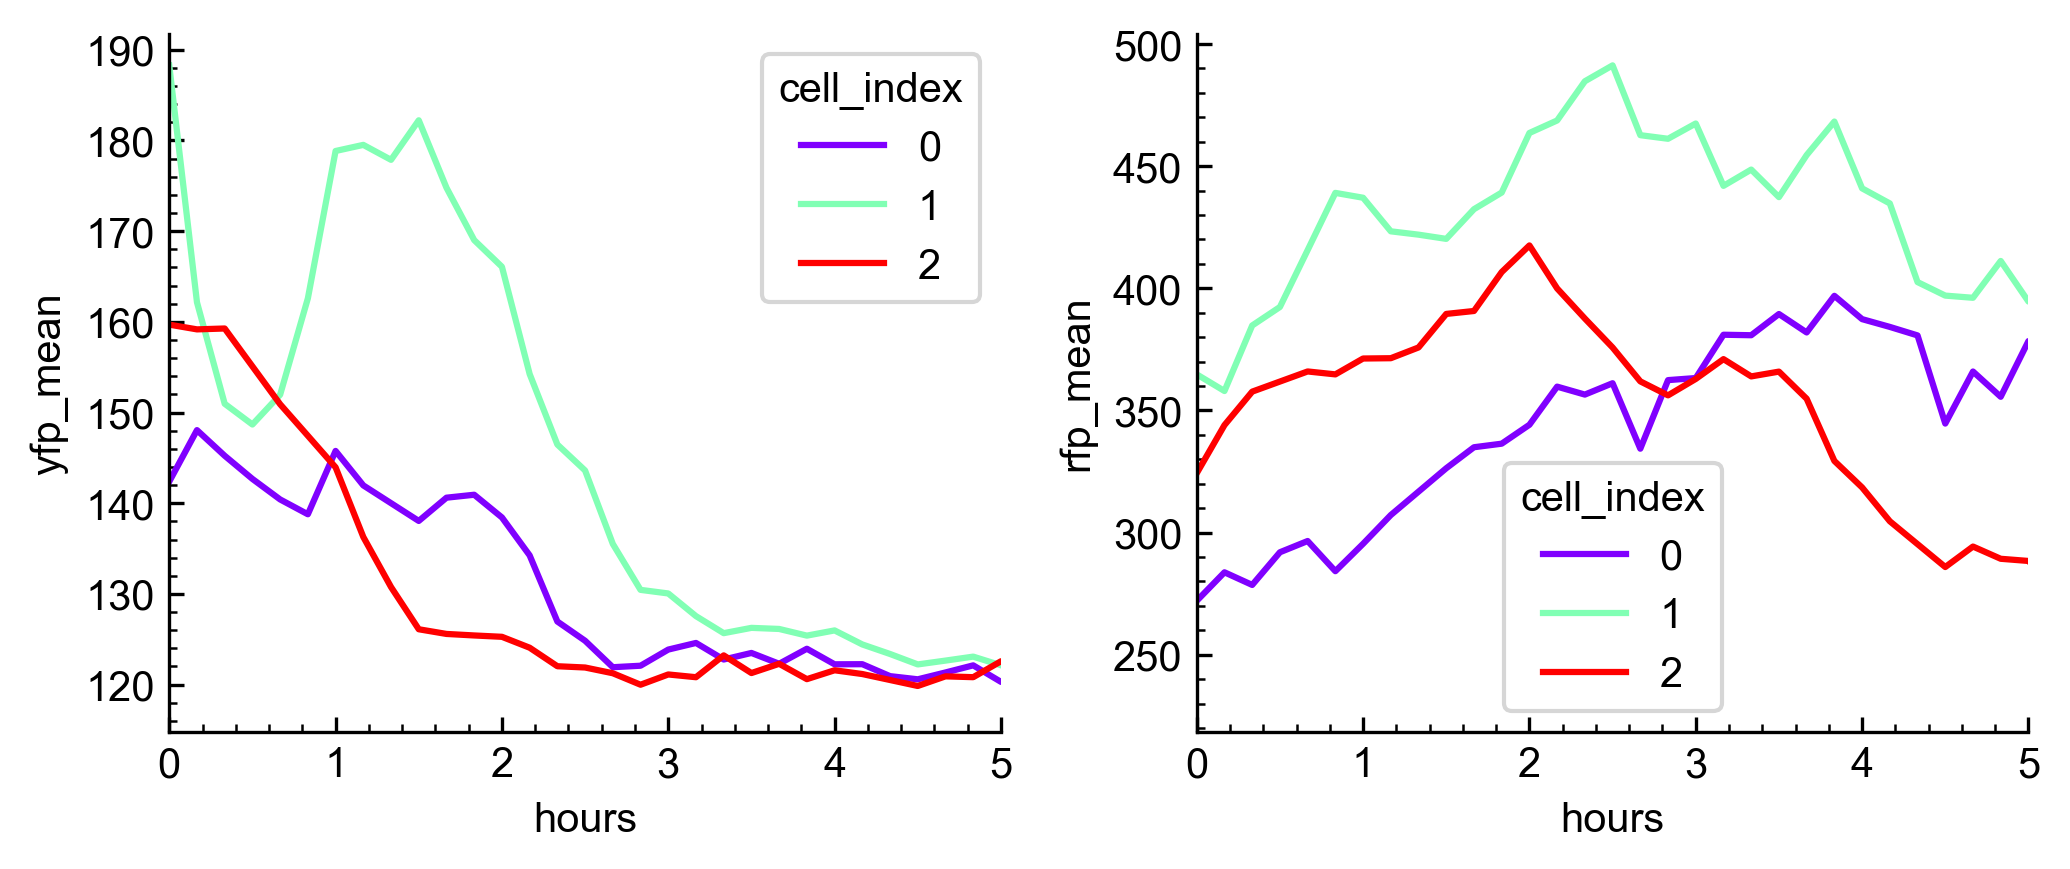

In [4]:
fig = plt.figure(figsize=(7, 3))
fig.set_dpi(300)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

linekwargs = {
    'y': 'yfp_mean',
    'x': 'hours',
    'hue': 'cell_index',
    'data': alldf,
    'ax': ax1,
    'palette': 'rainbow'
}

sns.lineplot(**linekwargs)

linekwargs = {
    'y': 'rfp_mean',
    'x': 'hours',
    'hue': 'cell_index',
    'data': alldf,
    'ax': ax2,
    'palette': 'rainbow'
}

sns.lineplot(**linekwargs)
for ax in [ax1, ax2]:
    ax.set_xlim(0, 5)
    plotting.remove_spines(ax)
    plotting.format_ticks(ax)
fig.tight_layout()

## Segment cell areas with brightfield data using a radial intensity peak-based segmentation method implemented in the `byc` script `segment_byc_dataset`

Usually this is done in budding yeast datasets where we are measuring dynamics of a fluorescent signal and don't have a fluorophore we can use for segmentation

In [6]:
script_path = os.path.join(constants.source_path, 'bin\segment_byc_dataset.py')
%run C:/Users/johnp/Dropbox/Projects/byc/bin/segment_byc_dataset.py $compartmentname "bf yfp rfp"

Using channels ['bf', 'yfp', 'rfp']
Proceeding with compartment 20230126_byc_JPC228_UBL-YFP-Su9_test from expt 20230126_byc
No previous measurements made at
C:\Users\johnp\Dropbox\Projects\byc\data/20230126_byc/20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_alldf.csv
Analyzing channels ['bf', 'yfp', 'rfp']
Found compartment directory:
C:\Users\johnp\Dropbox\Projects\byc\data/20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test
Found 3 potential crop_rois roi df .csv files
Adding relative path to mdf
Saved master index df at:
C:\Users\johnp\Dropbox\Projects\byc\data/20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test_crop_rois.csv
Looking for crop roi set path for cell 0 at 
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_cell000_crop_rois.zip
Looking for crop roi set path for cell 1 at 
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_cell001_crop_rois.zip
Looking for crop roi s

c:\.byc\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\.byc\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found 2 peaks
[ 7 12]
Using peak dist 12
Found 2 peaks
[ 7 12]
Using peak dist 12
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[7]
Using peak dist 12
Found 2 peaks
[ 6 15]
Using peak dist 11
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[6]
Using peak dist 11
Found 1 peaks
[6]
Using peak dist 11
Found 1 peaks
[6]
Using peak dist 11
Found 1 peaks
[8]
Using peak dist 13
Found 1 peaks
[12]
Using peak dist 17
Found 2 peaks
[ 6 15]
Using peak dist 11
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[6]
Using peak dist 11
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[3]
Using peak dist 8
Found 1 peaks
[2]
Using pe

c:\.byc\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\.byc\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found 2 peaks
[ 4 10]
Using peak dist 9
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[3]
Using peak dist 8
Found 1 peaks
[4]
Using peak dist 9
Found 2 peaks
[ 4 14]
Using peak dist 9
Found 2 peaks
[ 4 12]
Using peak dist 9
Found 1 peaks
[10]
Using peak dist 15
Found 1 peaks
[9]
Using peak dist 14
Found 1 peaks
[9]
Using peak dist 14
Found 1 peaks
[9]
Using peak dist 14
Found 1 peaks
[7]
Using peak dist 12
Found 2 peaks
[ 6 14]
Using peak dist 11
Found 2 peaks
[ 6 14]
Using peak dist 11
Found 1 peaks
[6]
Using peak dist 11
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[5]
Using peak dist 10
Found 2 peaks
[ 4 11]
Using peak dist 9
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[5]
Using peak dist 10
Found 2 peaks
[ 5 15]
Using peak dist 10
Found 2 peaks
[ 4 12]
Using peak dist 9
No peaks found at 1.3744467859455396 radians. Using last successful peak 9 pixels
Using peak dist 9
Found 1 peaks
[2]
Using pe

c:\.byc\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\.byc\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found 1 peaks
[6]
Using peak dist 11
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[3]
Using peak dist 8
Found 2 peaks
[ 1 15]
Using peak dist 6
Found 1 peaks
[2]
Using peak dist 7
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[8]
Using peak dist 13
Found 1 peaks
[10]
Using peak dist 15
Found 2 peaks
[ 4 15]
Using peak dist 9
Found 1 peaks
[4]
Using peak dist 9
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[5]
Using peak dist 10
Found 2 peaks
[ 4 12]
Using peak dist 9
Found 2 peaks
[ 4 11]
Using peak dist 9
Found 1 peaks
[7]
Using peak dist 12
Found 1 peaks
[6]
Using peak dist 11
Found 1 peaks
[5]
Using peak dist 10
Found 1 peaks
[5]
Using peak dist 10
No peaks found at 1.7671458676442642 radians. Using last successful 

c:\.byc\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\.byc\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Writing measured segmentation dataframe to
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_JPC228_UBL-YFP-Su9_test_alldf_measured.csv.gzip
Wrote all trace measurements df at 
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_JPC228_UBL-YFP-Su9_test_alldf_measured.csv.gzip
Saved trace table at
C:\Users\johnp\Dropbox\Projects\byc\data\20230126_byc\20230126_byc_JPC228_UBL-YFP-Su9_test\20230126_byc_alldf.csv


### Read in the measurements dataframe created using the script above

In [ ]:
print(f'Reading all cells trace df from \n{allmeasuredpath}')
allmeasureddf = pd.read_csv(allmeasuredpath, compression='gzip')
# Split combined cell dataframes back into individual ones
celldfs = [allmeasureddf[allmeasureddf.cell_index==cidx] for cidx in allmeasureddf.cell_index.unique()]

### Read in table of on record per frame per cell and annotate it

In [ ]:
filename = f'{exptname}_alldf.csv'
tracesavepath = os.path.join(compartmentdir, filename)
table = pd.read_csv(tracesavepath)
# Necessary for backwards compatibility
for channel in ['rfp', 'yfp']:
    legacy_name = f'Mean_{channel}_auto'
    new_name = f'{channel}_mean'
    if legacy_name in table.columns:
        print(f'Found legacy named column {legacy_name}')
        print(f'Renaming to {new_name}')
        table.loc[:, new_name] = table.loc[:, legacy_name]
# Annotate all information found in the master index dataframe
# into the compartment table
for col in mdf.columns:
    if col not in table.columns:
        for cell_index in mdf.cell_index.unique():
            val = mdf.loc[cell_index, col]
            table.loc[table.cell_index==cell_index, col] = val
table.loc[:, 'hours_rel'] = table.frame_rel*(10/60)
table.loc[:, 'frame_number'] = table.frame_rel
table.loc[:, 'exptname'] = exptname
celldfs = [table[table.cell_index==i].reset_index() for i in table.cell_index.unique()]

In [ ]:
segmentation.refine_and_annotate_celldfs(celldfs, mdf,
    collection_interval_minutes=10,
    channels_to_normalize=['rfp', 'yfp'],
    yvars=['mean'],
    channel_auto_fluors=[117, 136]
    )

alldf = pd.concat(celldfs)
alldf.index = range(len(alldf))
alldf.to_csv(tracesavepath, index=False)
print(f'Saved traces df at\n{tracesavepath}')

### Scan chase fit start frames to find an average t0

In [ ]:
first_crop_frame = 4

kwargs = {
    'xmin': 4,
    'xmax': 24
}

scandfs = []
for tracedf in tracedfs:
    if tracedf.first_crop_frame.iloc[0] == first_crop_frame:
        print(f'Scanning fit start frames for cell {tracedf.cell_index.iloc[0]}')

        scandf = ft.scan_start_frames(tracedf,
                                      col_name='Mean_yfp_auto',
                                      xvar='frame_rel',
                                      **kwargs)
        scandfs.append(scandf)
allscandf = pd.concat(scandfs, sort=False)

In [ ]:
allscandf.index = range(len(allscandf))
scandf = allscandf
yvar = 'b'
ylabel = 'Rate constant'
fig = plt.figure(figsize=(5, 2)) 
fig.set_dpi(300)
xlim = (0, 30)
ylim = (-0.1, 0.5)
size=1
color = 'black'
ax = fig.add_subplot(121)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.scatter(allscandf.start_frame, allscandf[yvar], s=size, color=color, alpha=0.2)
sns.lineplot(x='start_frame', y=yvar, data=allscandf,
             color='black', estimator=np.median, ax=ax)
ax.set_title(f'Chase at frame {first_crop_frame}')


for a in [ax]:
    a.set_ylabel(ylabel)
    a.set_xticks(np.arange(0, np.max(xlim)+1, 5))
    a.set_xlabel('t0 frame')    
    
plotting.format_ticks(ax)
plotting.remove_spines(ax)

plt.tight_layout()

In [ ]:
allscandf.index = range(len(allscandf))
scandf = allscandf
yvar = 'ss_residuals'
ylabel = 'Sum Sq. Residuals'
fig = plt.figure(figsize=(5, 2)) 
fig.set_dpi(300)
xlim = (0, 30)
ylim = (-0.1, 2)
size=1
color = 'black'
ax = fig.add_subplot(121)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.scatter(allscandf.start_frame, allscandf[yvar], s=size, color=color, alpha=0.2)
sns.lineplot(x='start_frame', y=yvar, data=allscandf,
             color='black', estimator=np.median, ax=ax)
ax.set_title(f'Chase at frame {first_crop_frame}')


for a in [ax]:
    a.set_ylabel(ylabel)
    a.set_xticks(np.arange(0, np.max(xlim)+1, 5))
    a.set_xlabel('t0 frame')    
    
plotting.format_ticks(ax)
plotting.remove_spines(ax)

plt.tight_layout()

In [ ]:
first_crop_frame = 134

kwargs = {
    'xmin': 4,
    'xmax': 24
}

scandfs = []
for tracedf in tracedfs:
    if tracedf.first_crop_frame.iloc[0] == first_crop_frame:
        print(f'Scanning fit start frames for cell {tracedf.cell_index.iloc[0]}')

        scandf = ft.scan_start_frames(tracedf,
                                      col_name='Mean_yfp_auto',
                                      xvar='frame_rel',
                                      **kwargs)
        scandfs.append(scandf)
allscandf = pd.concat(scandfs, sort=False)

In [ ]:
allscandf.index = range(len(allscandf))
scandf = allscandf
yvar = 'b'
ylabel = 'Rate constant'
fig = plt.figure(figsize=(5, 2)) 
fig.set_dpi(300)
xlim = (0, 30)
ylim = (-0.1, 0.5)
size=1
color = 'black'
ax = fig.add_subplot(121)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.scatter(allscandf.start_frame, allscandf[yvar], s=size, color=color, alpha=0.2)
sns.lineplot(x='start_frame', y=yvar, data=allscandf,
             color='black', estimator=np.median, ax=ax)
ax.set_title(f'Chase at frame {first_crop_frame}')


for a in [ax]:
    a.set_ylabel(ylabel)
    a.set_xticks(np.arange(0, np.max(xlim)+1, 5))
    a.set_xlabel('t0 frame')    
    
plotting.format_ticks(ax)
plotting.remove_spines(ax)

plt.tight_layout()

In [ ]:
allscandf.index = range(len(allscandf))
scandf = allscandf
yvar = 'ss_residuals'
ylabel = 'Sum Sq. Residuals'
fig = plt.figure(figsize=(5, 2)) 
fig.set_dpi(300)
xlim = (0, 30)
ylim = (-0.1, 2)
size=1
color = 'black'
ax = fig.add_subplot(121)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.scatter(allscandf.start_frame, allscandf[yvar], s=size, color=color, alpha=0.2)
sns.lineplot(x='start_frame', y=yvar, data=allscandf,
             color='black', estimator=np.median, ax=ax)
ax.set_title(f'Chase at frame {first_crop_frame}')


for a in [ax]:
    a.set_ylabel(ylabel)
    a.set_xticks(np.arange(0, np.max(xlim)+1, 5))
    a.set_xlabel('t0 frame')    
    
plotting.format_ticks(ax)
plotting.remove_spines(ax)

plt.tight_layout()

In [ ]:
# Check on all the unique crop starts in the data set incase 
# there were some other than the two above
tracesdf = pd.concat(tracedfs, sort=False)

crop_starts = np.sort(list(tracesdf.first_crop_frame.unique()))
crop_starts

### Plot t0 normalized substrate fluorescence over time for each cell using the t0 chase frames defined above

In [ ]:
tracesdf = pd.concat(tracedfs, sort=False)

crop_starts = np.sort(list(tracesdf.first_crop_frame.unique()))
chase_frames = [7, 11]

chase_frame_dict = dict(zip(list(crop_starts), chase_frames))

table = tracesdf
yvar = 'Mean_yfp_auto'
nrows = 1
ncols = len(crop_starts)
height = nrows*2.5
width = ncols*2.5
xlim = (0, 3)
ylim = (0, 1.2)
delta_t = 10
fig = plt.figure(figsize=(width, height))
fig.set_dpi(300)
axes = [fig.add_subplot(nrows, ncols, i+1) for i in range(len(crop_starts))]
axdict = dict(zip(crop_starts, axes))
# Plot each individual cell from each chase
for crop_start in crop_starts:
    ax = axdict[crop_start]
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    chase_frame = chase_frame_dict[crop_start]
    xy = (np.max(xlim)*0.4, np.max(ylim)*0.8)
    xy2 = (xy[0], np.max(ylim)*0.7)
    chase_hours = ((crop_start+chase_frame)*delta_t)/60
    chase_hours = np.round(chase_hours, 3)
    ax.annotate(f'Chase at {chase_hours} hrs', xy=xy)
    ax.annotate(f'Chase frame={chase_frame}', xy=xy2)
    startdf = table[table.first_crop_frame==crop_start]
    for cell_index in startdf.cell_index.unique():
        
        df = startdf[startdf.cell_index==cell_index]
        x = df.frame_rel[chase_frame:] - chase_frame
        x = (x*delta_t)/60
        y = df[yvar][chase_frame:] - df[yvar][:].min()
        y = y/y.iloc[0]
        ax.plot(x, y)
        ax.set_ylabel('YFP(t)/YFP(t0)')
        ax.set_xlabel('Time after chase (hrs)')
        plotting.remove_spines(ax)
plt.tight_layout()

In [ ]:
# Relabel tracedfs after having determined chase starts above
channels = ['bf', 'yfp']
args = [exptname,
        compartmentname]
kwargs = {'age_state': 'old',
          'chase_frame_dict': chase_frame_dict}

mdf = sa.create_and_annotate_mdf(*args, **kwargs)
# Set chase frames in celldf table according to above
crop_starts = chase_frame_dict.keys()
# For some reason dist_from_sen is getting fucked up so redefine
# it straight from master index df
for cell_index in mdf.cell_index.unique():
    abs_chase_frame = mdf[mdf.cell_index==cell_index].abs_chase_frame.iloc[0]
    dist_from_sen = mdf[mdf.cell_index==cell_index].dist_from_sen.iloc[0]
    table.loc[table.cell_index==cell_index, 'dist_from_sen'] = dist_from_sen
    table.loc[table.cell_index==cell_index, 'abs_chase_frame'] = abs_chase_frame

for crop_start in crop_starts:
    chase_frame = chase_frame_dict[crop_start]
    table.loc[table.first_crop_frame==crop_start, 'chase_frame'] = chase_frame
# Add a t0 normalized column to each trace dataframe
tracedfs = [table[table.cell_index==cidx] for cidx in table.cell_index.unique()]
for df in tracedfs:
    df.index = range(len(df))
tracedfs = [sa.t0_normalize_trace_df(tracedf,
                                     yvar='Mean_yfp_auto',
                                     norm_col_name='yfp_norm') for tracedf in tracedfs]

### Plot t0 normalized traces with color corresponding to senescence proximity

In [ ]:
palette = sns.color_palette("Spectral", n_colors=int(np.max(table.dist_from_sen))+1)

fig, ax = plotting.figure_ax(width_scale=1, height_scale=0.1)
ax.set_xlim(0, 27)
ax.set_xticks([0, 5, 10, 15, 20, 25])
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
plot = sns.palplot(palette)

In [ ]:
dfs = tracedfs
savefig=True
y_var = 'yfp_norm'
plotkwargs = {'alpha': 0.6,
              'linewidth': 1.5}

ylabel = 'YFP(t)/YFP(t0)'
xlabel = 'Time after chase (hrs)'
compdir = os.path.join(constants.byc_data_dir, mdf.compartment_reldir.unique()[0])
exptdir = os.path.abspath(os.path.join(compdir, '..'))
filetype = '.png'
savepath = os.path.join(compdir, f'Yfp_vs_time_color_dist_from_sen{filetype}')

ylim = (0, 1.2)
xlim = (0, 3)
fig = plt.figure(figsize=(2.5, 2.5))
fig.set_dpi(300)

ax = fig.add_subplot(111)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

colors = sns.color_palette('husl', len(dfs))
for i, df in enumerate(dfs):
    chase_frame = df.chase_frame.unique()[0]
    y = df.loc[chase_frame:, y_var]
    x = [(i*10)/60 for i in range(len(y))]
    dist_from_sen = df.dist_from_sen.iloc[0]
    if not np.isnan(dist_from_sen):
        color =palette[int(dist_from_sen)]
        ax.plot(x, y, color=color, label=f'Cell {i}', **plotkwargs)
    else:
        print(f'Dist from sen is nan for cell {df.cell_index.unique()[0]}')

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for spine in [ax.spines[key] for key in ['top', 'right']]:
    spine.set_visible(False)
    
ax.set_ylabel(ylabel, fontsize=14)
ax.set_xlabel(xlabel, fontsize=14)
loc = (0.3*np.max(xlim), 0.9*np.max(ylim))
# ax.annotate(f'Chase frame = {chase_frame}', xy=loc)
plotting.format_ticks(ax, xminorspace=0.2, yminorspace=0.1)
plt.tight_layout()
if savefig:
    fig.savefig(savepath)
    print(f'Saved figure at:\n{savepath}')

### Fit fluorescence traces to exponential decay to derive pseudo first order rate constant

In [ ]:
col_name = 'Mean_yfp_auto'
fits_df = ft.get_all_fits_df(tracedfs, None, 18, col_name=col_name)
# Get rid of failed fit data
fits_df = fits_df[fits_df.b.isna() == False]

### For each cell, scatter plot fluorescence vs time after chase and line plot the fit so they can be visually inspected

In [ ]:
filename = 'all_cell_fits.svg'
compdir = os.path.join(constants.byc_data_dir, mdf.compartment_reldir.iloc[0])
savepath = os.path.join(compdir, filename)

fits_df.sort_values(by='cell_index', inplace=True)
nrows = 37
ncols = 6
fig = plt.figure(figsize=(ncols*2.4, nrows*2.4))
fig.set_dpi(300)
i=1
xlim = (0, 3)
ylim = (0, 1.2)
for cell_index in fits_df.cell_index.unique():
    df = fits_df[fits_df.cell_index==cell_index]
    dist_from_sen = df.dist_from_sen.unique()[0]
    rate = np.round(df.b.unique()[0], 3)
    ax = fig.add_subplot(nrows, ncols, i)
    sns.scatterplot(x='x_input', y='y_input_norm', color='black',
                    data=df, ax=ax)
    sns.lineplot(x='x_input', y='y_pred_norm', color='black',
                 data=df, ax=ax)
    
    ax.set_title(f'Cell{cell_index}')
   
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    shapiro_p = df.shapiro_p.iloc[0]
    shapiro_p_round = np.round(shapiro_p, 3)
    xy = (0.5, np.max(ylim)*0.8)
    xyrate = (0.5, np.max(ylim)*0.7)
    xyabschase = (0.5, np.max(ylim)*0.6)
    if shapiro_p < 0.05:
        color= 'red'
    else:
        color='black'
    ax.annotate(f'Shapiro p={shapiro_p_round}', xy=xy, color=color)
    ax.annotate(f'Rate={rate}', xy=xyrate)
    ax.annotate(f'Abs chase frame={int(df.abs_chase_frame.iloc[0])}', xy=xyabschase)
    i+=1
plt.tight_layout()
fig.savefig(savepath)
print(f'Figure saved at\n{savepath}')

In [ ]:
# Define chase offsets based on visual inspection of all cell fits plot below
# There are often cases where an exponential decay clearly starts one timepoint
# after the median residuals minimum calculated above
chase_offsets = {
    17: 1,
    19: 1,
    20: 1,
    21: 1,
    32: 1,
    36: 1,
    45: 1,
    71: 2,
    74: 2
}
# Include cell indices where signal was clearly already at background 
# and fit is just to noise
drops = [
    25,
    29,
    37,
    41,
    42,
    47,
    61,
    63,
    81,
    85
]
if chase_offsets:
    for cell_index, chase_frame_offset in chase_offsets.items():
        tracedfs[cell_index].loc[:, 'abs_chase_frame'] = tracedfs[cell_index].loc[:, 'abs_chase_frame'] + chase_frame_offset
        tracedfs[cell_index].loc[:, 'chase_frame'] = tracedfs[cell_index].loc[:, 'chase_frame'] + chase_frame_offset
col_name = 'Mean_yfp_auto'
fits_df = ft.get_all_fits_df(tracedfs, None, 18, col_name=col_name)
# Get rid of failed fit data
fits_df = fits_df[fits_df.b.isna() == False]
# Drop cells that are clearly bad data based on above plots
fits_df = fits_df[~(fits_df.cell_index.isin(drops))].reset_index()

In [ ]:
filename = 'all_cell_fits.svg'
compdir = os.path.join(constants.byc_data_dir, mdf.compartment_reldir.iloc[0])
savepath = os.path.join(compdir, filename)

fits_df.sort_values(by='cell_index', inplace=True)
nrows = 37
ncols = 6
fig = plt.figure(figsize=(ncols*2.4, nrows*2.4))
fig.set_dpi(300)
i=1
xlim = (0, 3)
ylim = (0, 1.2)
for cell_index in fits_df.cell_index.unique():
    df = fits_df[fits_df.cell_index==cell_index]
    dist_from_sen = df.dist_from_sen.unique()[0]
    rate = np.round(df.b.unique()[0], 3)
    ax = fig.add_subplot(nrows, ncols, i)
    sns.scatterplot(x='x_input', y='y_input_norm', color='black',
                    data=df, ax=ax)
    sns.lineplot(x='x_input', y='y_pred_norm', color='black',
                 data=df, ax=ax)
    
    ax.set_title(f'Cell{cell_index}')
   
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    shapiro_p = df.shapiro_p.iloc[0]
    shapiro_p_round = np.round(shapiro_p, 3)
    xy = (0.5, np.max(ylim)*0.8)
    xyrate = (0.5, np.max(ylim)*0.7)
    xyabschase = (0.5, np.max(ylim)*0.6)
    if shapiro_p < 0.05:
        color= 'red'
    else:
        color='black'
    ax.annotate(f'Shapiro p={shapiro_p_round}', xy=xy, color=color)
    ax.annotate(f'Rate={rate}', xy=xyrate)
    ax.annotate(f'Abs chase frame={int(df.abs_chase_frame.iloc[0])}', xy=xyabschase)
    i+=1
plt.tight_layout()
fig.savefig(savepath)
print(f'Figure saved at\n{savepath}')

In [ ]:
# Drop any more cells that are clearly bad data based on above plots
drops = [
    
]
fits_df = fits_df[~(fits_df.cell_index.isin(drops))].reset_index()

### Save the fits_df (fluorescence traces) and fits_table (one row per cell with its rate constant) so they can be read in to the database elsewhere

In [ ]:

kwargs = {'mdf': mdf,
          'fits_df': fits_df,
          'drops': drops}
fits_df, fits_table = database.write_final_fits_dfs(**kwargs)

### Scatter plot of exponential decay rate constants vs. number of buds that will be produced before death

In [ ]:
df = fits_table
mdf = mdf
yvar = 'b'
xvar = 'dist_from_sen'
scatterkwargs = {'color': 'white',
                 'edgecolor': 'blue'}
linekwargs = {'color': 'blue',
              'linestyle': '--'}
ylabel = 'k (hr$^{-1}$)'
xlabel = 'Generations from\nSenescence'
compdir = os.path.join(constants.byc_data_dir, mdf.compartment_reldir.unique()[0])
exptdir = os.path.abspath(os.path.join(compdir, '..'))
savepath = os.path.join(compdir, f'{yvar}_vs_{xvar}.svg')
from scipy.stats import linregress
ylim = (0, 6)
xlim = (30, -1)
xminorspace = 1
yminorspace = 0.1
xticks = np.linspace(xlim[0], 0, 7)
fig = plt.figure(figsize=(2.5, 2.5))
fig.set_dpi(300)

ax = fig.add_subplot(111)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticks(xticks)
x = df.loc[:, xvar]
y = df.loc[:, yvar]
ax.scatter(x, y, **scatterkwargs)

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for spine in [ax.spines[key] for key in ['top', 'right']]:
    spine.set_visible(False)
    
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)

# Plot linear regression
slope, intercept, r, p, se = linregress(x, y)
x_smooth = np.linspace(np.min(xlim), np.max(xlim), 30)
y_pred = ft.line(x_smooth, slope, intercept)
r_sq = r*r
r_sq_term = 'R$^2$'
r_sq_label = f'{r_sq_term}={np.round(r_sq, 3)}'
ax.plot(x_smooth, y_pred, **linekwargs)
rloc = (0.8*np.max(xlim), 0.9*np.max(ylim))
ploc = (0.8*np.max(xlim), 0.83*np.max(ylim))
nloc = (0.8*np.max(xlim), 0.76*np.max(ylim))
sloc = (0.8*np.max(xlim), 0.69*np.max(ylim))
ax.annotate(f'{r_sq_label}', xy=rloc)
ax.annotate(f'p-value={np.round(p, 8)}', xy=ploc)
ax.annotate(f'N={len(y)}', xy=nloc)
ax.annotate(f'Slope={str(slope)[0:8]}', xy=sloc)
plotting.format_ticks(ax, xminorspace=xminorspace)
# ax.annotate(f'slope={np.round(slope, 3)}', xy=sloc)
print(f'N={len(df.loc[:, yvar])}')
fig.savefig(savepath)
print(f'Saved figure at: \n{savepath}')